Tutorial: http://www.mdtutorials.com/gmx/lysozyme/

In [1]:
!apt-get install gromacs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-mathjax gromacs-data libfftw3-double3 libfftw3-single3 libgromacs6
  libjs-mathjax sse4.2-support
Suggested packages:
  pymol libfftw3-bin libfftw3-dev fonts-mathjax-extras fonts-stix
  libjs-mathjax-doc
The following NEW packages will be installed:
  fonts-mathjax gromacs gromacs-data libfftw3-double3 libfftw3-single3
  libgromacs6 libjs-mathjax sse4.2-support
0 upgraded, 8 newly installed, 0 to remove and 18 not upgraded.
Need to get 58.3 MB of archives.
After this operation, 310 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 sse4.2-support amd64 6 [8,572 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-mathjax all 2.7.9+dfsg-1 [2,208 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu8 [770 kB]
Get:4 http://archiv

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mdtraj nglview
!apt-get install grace

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
grace is already the newest version (1:5.1.25-12build1).
gromacs is already the newest version (2021.4-2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
!wget https://files.rcsb.org/download/1AKI.pdb

--2023-10-03 16:09:16--  https://files.rcsb.org/download/1AKI.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.213.147, 132.249.213.193, 128.6.159.100, ...
Connecting to files.rcsb.org (files.rcsb.org)|132.249.213.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1AKI.pdb’

1AKI.pdb                [  <=>               ] 113.59K   250KB/s    in 0.5s    

2023-10-03 16:09:18 (250 KB/s) - ‘1AKI.pdb’ saved [116316]



In [ ]:
!grep -v HOH 1AKI.pdb > 1AKI_clean.pdb

In [14]:
!ls /usr/share/gromacs/top/

amber03.ff	   electroneg.dat	 gromos53a6.ff	   spc.itp
amber94.ff	   elements.dat		 gromos54a7.ff	   specbond.dat
amber96.ff	   export.dlg		 ha-shift.dat	   ss.map
amber99.ff	   ffG43a1.itp		 ions.itp	   surface.dat
amber99sb.ff	   ffG43a2.itp		 nsfactor.dat	   sw.itp
amber99sb-ildn.ff  ffG45a3.itp		 oplsaa.ff	   table6-10.xvg
amberGS.ff	   ffG53a5.itp		 phbres.dat	   table6-11.xvg
atommass.dat	   ffG53a6.itp		 ps.m2p		   table6-12.xvg
atom_nom.tbl	   ffoplsaa.itp		 random.dat	   table6-8.xvg
bonds.dlg	   ffoplsaa-n.tst	 README		   table6-9.xvg
ca-shift.dat	   flexspce.itp		 refi_aa.dat	   tip3p.itp
cb-shift.dat	   flexspc.itp		 residues.dtd	   tip4p.gro
charmm27.ff	   flexwat-ferguson.itp  residues.xml	   tip4p.itp
co-shift.dat	   gromos43a1.ff	 residuetypes.dat  tip5p.gro
defselection.dat   gromos43a2.ff	 sfactor.dat	   vdw-msms.dat
dgsolv.dat	   gromos45a3.ff	 spc216.gro	   vdwradii.dat
edissoc.dat	   gromos53a5.ff	 spce.itp	   xlateat.dat


In [ ]:
!gmx pdb2gmx -f 1AKI_clean.pdb -o 1AKI_processed.gro -ff charmm27 -water spc

             :-) GROMACS - gmx pdb2gmx, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import mdtraj
import nglview

traj = mdtraj.load('1AKI_processed.gro')
view = nglview.show_mdtraj(traj)
view.clear_representations()
view.add_representation('ball+stick')
view

NGLWidget()

In [ ]:
!gmx editconf -f 1AKI_processed.gro -o 1AKI_newbox.gro -c -d 1.0 -bt cubic

             :-) GROMACS - gmx editconf, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff           

In [ ]:
!gmx solvate -cp 1AKI_newbox.gro -cs spc216.gro -o 1AKI_solv.gro -p topol.top

             :-) GROMACS - gmx solvate, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
traj = mdtraj.load('1AKI_solv.gro')
view = nglview.show_mdtraj(traj)
view.clear_representations()
view.add_representation('point',selection='water',opacity=0.25)
view

NGLWidget()

In [ ]:
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/ions.mdp

--2023-10-03 16:09:26--  http://www.mdtutorials.com/gmx/lysozyme/Files/ions.mdp
Resolving www.mdtutorials.com (www.mdtutorials.com)... 13.59.3.21
Connecting to www.mdtutorials.com (www.mdtutorials.com)|13.59.3.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1045 (1.0K)
Saving to: ‘ions.mdp’

ions.mdp            100%[===================>]   1.02K  --.-KB/s    in 0s      

2023-10-03 16:09:26 (69.8 MB/s) - ‘ions.mdp’ saved [1045/1045]



In [ ]:
!cp ions.mdp ions.mdp.txt

In [ ]:
!gmx grompp -f ions.mdp -c 1AKI_solv.gro -p topol.top -o ions.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!cp topol.top topol.top.txt
# !cp topol.top.txt topol.top

In [ ]:
%%writefile group13.txt
13


Writing group13.txt


In [ ]:
!gmx genion -s ions.tpr -o 1AKI_solv_ions.gro -p topol.top -pname NA -nname CL -neutral <group13.txt

              :-) GROMACS - gmx genion, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
traj = mdtraj.load('1AKI_solv_ions.gro')
view = nglview.show_mdtraj(traj)
view.clear_representations()
view.add_representation('point',selection="water")
view.add_representation('spacefill',selection="ion")
view

NGLWidget()

In [ ]:
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/minim.mdp

--2023-10-03 16:09:38--  http://www.mdtutorials.com/gmx/lysozyme/Files/minim.mdp
Resolving www.mdtutorials.com (www.mdtutorials.com)... 13.59.3.21
Connecting to www.mdtutorials.com (www.mdtutorials.com)|13.59.3.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1045 (1.0K)
Saving to: ‘minim.mdp’

minim.mdp           100%[===================>]   1.02K  --.-KB/s    in 0s      

2023-10-03 16:09:38 (130 MB/s) - ‘minim.mdp’ saved [1045/1045]



In [ ]:
!cp minim.mdp minim.mdp.txt

In [ ]:
!gmx grompp -f minim.mdp -c 1AKI_solv_ions.gro -p topol.top -o em.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!gmx mdrun -v -deffnm em 1>em21sep23.out.txt 2>em21sep23.err.txt

In [ ]:
%%writefile edrpotential.txt
10 0


Writing edrpotential.txt


In [ ]:
!gmx energy -f em.edr -o potential.xvg <edrpotential.txt
# type "10 0"

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!grace -hardcopy -hdevice SVG -nxy potential.xvg -printfile potential.svg

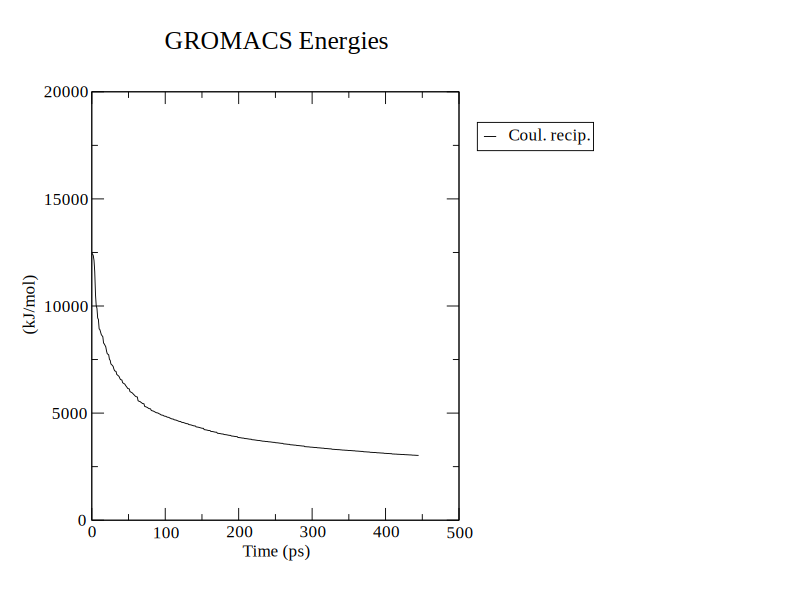

In [ ]:
from IPython.display import SVG, display
display(SVG("potential.svg"))

In [ ]:
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/nvt.mdp

--2023-10-03 16:10:41--  http://www.mdtutorials.com/gmx/lysozyme/Files/nvt.mdp
Resolving www.mdtutorials.com (www.mdtutorials.com)... 13.59.3.21
Connecting to www.mdtutorials.com (www.mdtutorials.com)|13.59.3.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2369 (2.3K)
Saving to: ‘nvt.mdp’

nvt.mdp             100%[===================>]   2.31K  --.-KB/s    in 0s      

2023-10-03 16:10:41 (249 MB/s) - ‘nvt.mdp’ saved [2369/2369]



In [ ]:
!cp nvt.mdp nvt.mdp.txt
#!mv nvt.mdp.txt nvt.mdp

In [ ]:
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!cp potential.xvg potential.xvg.txt

In [ ]:
!gmx mdrun -deffnm nvt 1>nvt21sep23.out.txt 2>nvt21sep23.err.txt

In [ ]:
%%writefile edrtemperature.txt
16 0


Writing edrtemperature.txt


In [ ]:
!gmx energy -f nvt.edr -o temperature.xvg <edrtemperature.txt
#Type "16 0"

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!grace -hardcopy -hdevice SVG -nxy temperature.xvg -printfile temperature.svg

Output is truncated - tune device dimensions


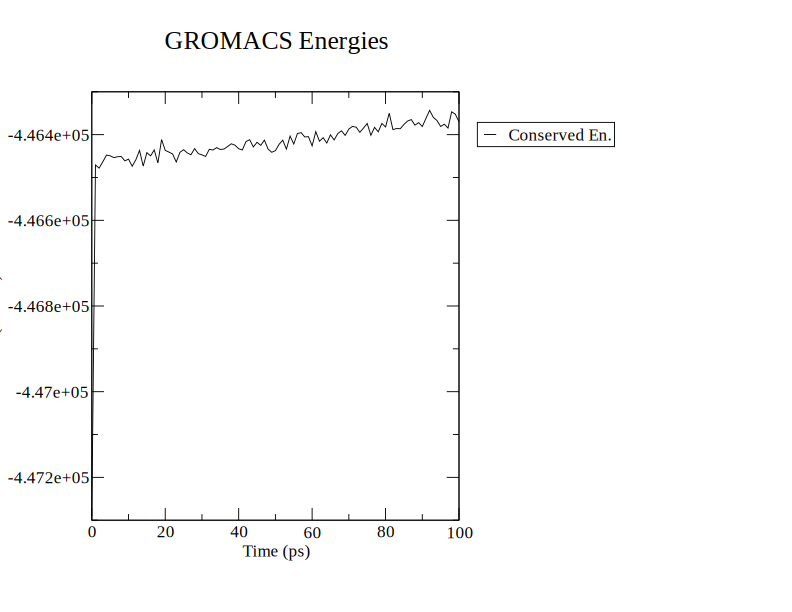

In [ ]:
display(SVG("temperature.svg"))

In [ ]:
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/npt.mdp

--2023-10-03 16:58:07--  http://www.mdtutorials.com/gmx/lysozyme/Files/npt.mdp
Resolving www.mdtutorials.com (www.mdtutorials.com)... 13.59.3.21
Connecting to www.mdtutorials.com (www.mdtutorials.com)|13.59.3.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2591 (2.5K)
Saving to: ‘npt.mdp’

npt.mdp             100%[===================>]   2.53K  --.-KB/s    in 0s      

2023-10-03 16:58:07 (364 MB/s) - ‘npt.mdp’ saved [2591/2591]



In [ ]:
!cp npt.mdp npt.mdp.txt
# !cp npt.txt npt.mdp

In [15]:
!cat npt.mdp

title                   = OPLS Lysozyme NPT equilibration 
define                  = -DPOSRES  ; position restrain the protein
; Run parameters
integrator              = md        ; leap-frog integrator
nsteps                  = 50000     ; 2 * 50000 = 100 ps
dt                      = 0.002     ; 2 fs
; Output control
nstxout                 = 500       ; save coordinates every 1.0 ps
nstvout                 = 500       ; save velocities every 1.0 ps
nstenergy               = 500       ; save energies every 1.0 ps
nstlog                  = 500       ; update log file every 1.0 ps
; Bond parameters
continuation            = yes       ; Restarting after NVT 
constraint_algorithm    = lincs     ; holonomic constraints 
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter              = 1         ; accuracy of LINCS
lincs_order             = 4         ; also related to accuracy
; Nonbonded settings 
cutoff-scheme           = Verlet    ; Buffered neighbor searc

In [ ]:
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!gmx mdrun -deffnm npt 1>nvt21sep23.out.txt 2>nvt21sep23.err.txt

In [ ]:
#!grace --help

In [ ]:
%%writefile edrpressure.txt
18 0


Writing edrpressure.txt


In [ ]:
!gmx energy -f npt.edr -o pressure.xvg <edrpressure.txt
#Type "18 0"

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!cp pressure.xvg pressure.xvg.txt
#!cp pressure.txt pressure.xvg

# Add the following to pressure.xvg
'''
  @ s1 legend "3-ps running average"
  @  RUNAVG (s0, 3)
'''

'\n  @ s1 legend "3-ps running average"\n  @  RUNAVG (s0, 3)\n'

In [ ]:
!grace -hardcopy -hdevice SVG -nxy pressure.xvg -printfile pressure.svg

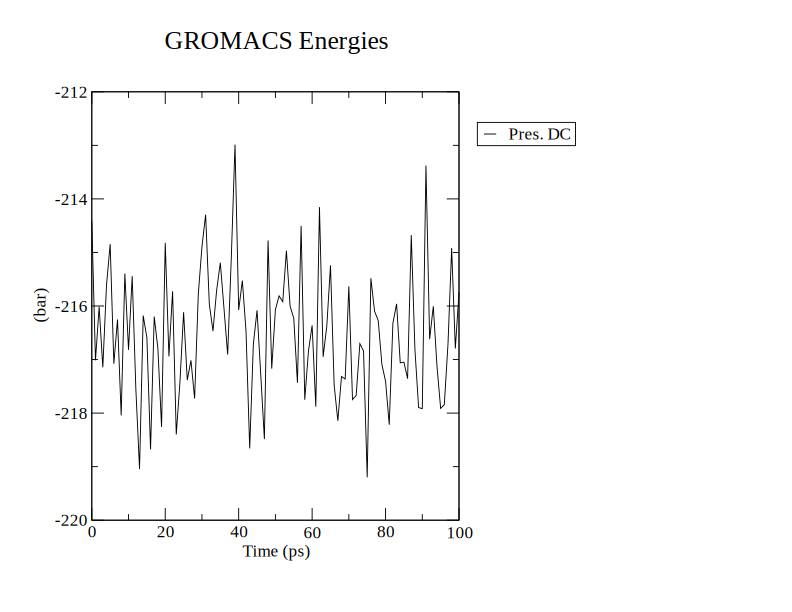

In [ ]:
display(SVG("pressure.svg"))

In [ ]:
%%writefile edrdensity.txt
24 0


Writing edrdensity.txt


In [ ]:
!gmx energy -f npt.edr -o density.xvg <edrdensity.txt
#  "24 0"

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!cp density.xvg density.xvg.txt
#!cp density.txt density.xvg

# Add the following to density.xvg
'''
  @ s1 legend "3-ps running average"
  @  RUNAVG (s0, 3)
'''

'\n  @ s1 legend "3-ps running average"\n  @  RUNAVG (s0, 3)\n'

In [ ]:
!grace -hardcopy -hdevice SVG -nxy density.xvg -printfile density.svg

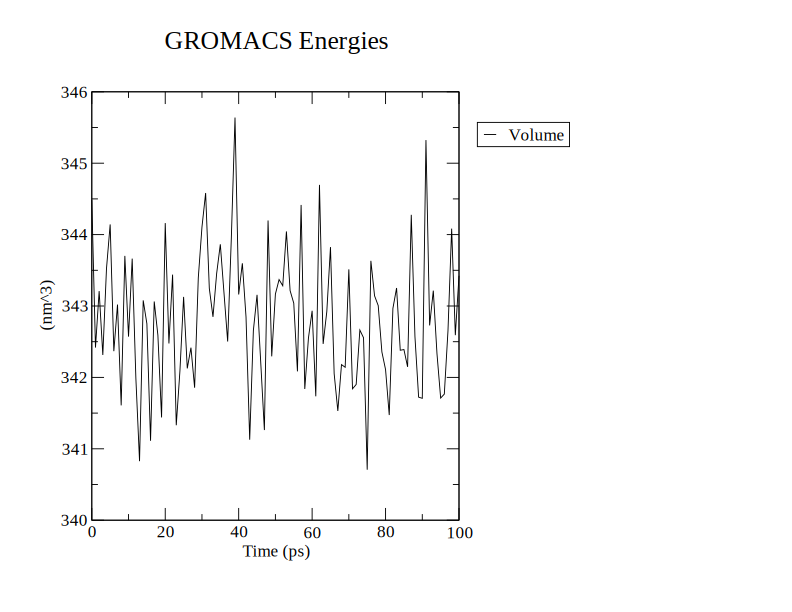

In [ ]:
display(SVG("density.svg"))

In [ ]:
!wget http://www.mdtutorials.com/gmx/lysozyme/Files/md.mdp

--2023-10-03 17:45:52--  http://www.mdtutorials.com/gmx/lysozyme/Files/md.mdp
Resolving www.mdtutorials.com (www.mdtutorials.com)... 13.59.3.21
Connecting to www.mdtutorials.com (www.mdtutorials.com)|13.59.3.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2741 (2.7K)
Saving to: ‘md.mdp’

md.mdp              100%[===================>]   2.68K  --.-KB/s    in 0s      

2023-10-03 17:45:52 (247 MB/s) - ‘md.mdp’ saved [2741/2741]



In [ ]:
!cp md.mdp md.mdp.txt
#!cp md.mdp.10.txt md.mdp

#change
'''
nsteps                  = 5000 ;00    ; 2 * 500000 = 1000 ps (1 ns)

nstxout-compressed      = 500 ;0      ; save compressed coordinates every 10.0 ps
'''

'\nnsteps                  = 5000 ;00    ; 2 * 500000 = 1000 ps (1 ns)\n\nnstxout-compressed      = 500 ;0      ; save compressed coordinates every 10.0 ps\n'

In [ ]:
!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_01of10.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
#!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_01of10.tpr
#!gmx mdrun -deffnm md_0_1_01of10
#!cp md_0_1_01* drive/MyDrive/GromacsExample/
#!gmx grompp -f md.mdp -c md_0_1_01of10.gro -t md_0_1_01of10.cpt -p topol.top -o md_0_1_02of10.tpr
#!gmx mdrun -deffnm md_0_1_02of10
#!cp md_0_1_02* drive/MyDrive/GromacsExample/
#!gmx grompp -f md.mdp -c md_0_1_02of10.gro -t md_0_1_02of10.cpt -p topol.top -o md_0_1_03of10.tpr
#!gmx mdrun -deffnm md_0_1_03of10
#!cp md_0_1_03* drive/MyDrive/GromacsExample/
#!gmx grompp -f md.mdp -c md_0_1_03of10.gro -t md_0_1_03of10.cpt -p topol.top -o md_0_1_04of10.tpr
#!gmx mdrun -deffnm md_0_1_04of10
#!cp md_0_1_04* drive/MyDrive/GromacsExample/
#!gmx grompp -f md.mdp -c md_0_1_04of10.gro -t md_0_1_04of10.cpt -p topol.top -o md_0_1_05of10.tpr
#!gmx mdrun -deffnm md_0_1_05of10
#!cp md_0_1_05* drive/MyDrive/GromacsExample/
#!gmx grompp -f md.mdp -c md_0_1_05of10.gro -t md_0_1_05of10.cpt -p topol.top -o md_0_1_06of10.tpr
#!gmx mdrun -deffnm md_0_1_06of10
#!cp md_0_1_06* drive/MyDrive/GromacsExample/
# !gmx grompp -f md.mdp -c md_0_1_06of10.gro -t md_0_1_06of10.cpt -p topol.top -o md_0_1_07of10.tpr
# !gmx mdrun -deffnm md_0_1_07of10
# !cp md_0_1_07* drive/MyDrive/GromacsExample/
# !gmx grompp -f md.mdp -c md_0_1_07of10.gro -t md_0_1_07of10.cpt -p topol.top -o md_0_1_08of10.tpr
# !gmx mdrun -deffnm md_0_1_08of10
# !cp md_0_1_08* drive/MyDrive/GromacsExample/
# !gmx grompp -f md.mdp -c md_0_1_08of10.gro -t md_0_1_08of10.cpt -p topol.top -o md_0_1_09of10.tpr
# !gmx mdrun -deffnm md_0_1_09of10
# !cp md_0_1_09* drive/MyDrive/GromacsExample/
#!gmx grompp -f md.mdp -c md_0_1_09of10.gro -t md_0_1_09of10.cpt -p topol.top -o md_0_1_10of10.tpr
#!gmx mdrun -deffnm md_0_1_10of10
#!cp md_0_1_10* drive/MyDrive/GromacsExample/

In [ ]:
#!gmx trjcat -f md_0_1_01of10.xtc md_0_1_02of10.xtc md_0_1_03of10.xtc md_0_1_04of10.xtc md_0_1_05of10.xtc md_0_1_06of10.xtc md_0_1_07of10.xtc md_0_1_08of10.xtc md_0_1_09of10.xtc md_0_1_10of10.xtc -o md_0_1_full.xtc -settime
#!cp md_0_1_full.xtc drive/MyDrive/GromacsExample/

In [ ]:
#!gmx eneconv -f md_0_1_01of10.edr md_0_1_02of10.edr md_0_1_03of10.edr md_0_1_04of10.edr md_0_1_05of10.edr md_0_1_06of10.edr md_0_1_07of10.edr md_0_1_08of10.edr md_0_1_09of10.edr md_0_1_10of10.edr -o md_0_1_full.edr -settime
#!cp md_0_1_full.edr drive/MyDrive/GromacsExample/

In [8]:
%%writefile prot1.txt
1


Writing prot1.txt


In [10]:
!gmx trjconv -s md_0_1.tpr -f md_0_1.gro -o md_0_1_prot.gro <prot1.txt

             :-) GROMACS - gmx trjconv, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [11]:
!gmx trjconv -s md_0_1.tpr -f md_0_1.xtc -o md_0_1_prot.xtc <prot1.txt

             :-) GROMACS - gmx trjconv, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [13]:
#!cp md_0_1_10of10_prot.gro drive/MyDrive/GromacsExample/

In [ ]:
# traj = mdtraj.load_xtc('md_0_1_prot.xtc', top='md_0_1_prot.gro')

# view = nglview.show_mdtraj(traj)
# #view.clear_representations()
# #view.add_representation('ball+stick')
# view

In [3]:
# !cp md_0_1_01* drive/MyDrive/GromacsExample/
#!cp drive/MyDrive/GromacsExample/* .

In [ ]:
#!cp md.mdp.10.txt drive/MyDrive/GromacsExample/